# HMEQ_Data
## Predict clients who default on their loan

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
ds = pd.read_csv('Data/datasets.csv')

In [ ]:
ds

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5955,0,88900,57264.0,90185.0,DebtCon,Other,16.0,0.0,0.0,221.808718,0.0,16.0,36.112347
5956,0,89000,54576.0,92937.0,DebtCon,Other,16.0,0.0,0.0,208.692070,0.0,15.0,35.859971
5957,0,89200,54045.0,92924.0,DebtCon,Other,15.0,0.0,0.0,212.279697,0.0,15.0,35.556590
5958,0,89800,50370.0,91861.0,DebtCon,Other,14.0,0.0,0.0,213.892709,0.0,16.0,34.340882


## Many row have Non elements, so drop this all row

In [ ]:
df = ds[ds['VALUE'].isnull()]
df = df[df['JOB'].isnull()]
df = df[df['REASON'].isnull()]
df = df[df['DEROG'].isnull()]
df = df[df['DELINQ'].isnull()]
df = df.reset_index()
df = df['index']
df

0       3
1      10
2      17
3    1405
4    1507
5    1897
6    1959
7    1960
8    2303
9    2449
Name: index, dtype: int64

In [ ]:
ds = ds.drop(df)
ds = ds.reset_index()
ds = ds.drop(['index'], axis = 1)

In [ ]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5950 entries, 0 to 5949
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BAD      5950 non-null   int64  
 1   LOAN     5950 non-null   int64  
 2   MORTDUE  5440 non-null   float64
 3   VALUE    5848 non-null   float64
 4   REASON   5708 non-null   object 
 5   JOB      5681 non-null   object 
 6   YOJ      5443 non-null   float64
 7   DEROG    5252 non-null   float64
 8   DELINQ   5380 non-null   float64
 9   CLAGE    5652 non-null   float64
 10  NINQ     5450 non-null   float64
 11  CLNO     5738 non-null   float64
 12  DEBTINC  4686 non-null   float64
dtypes: float64(9), int64(2), object(2)
memory usage: 604.4+ KB


In [ ]:
ds.describe()

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
count,5950.000000,5950.000000,5440.000000,5848.000000,5443.000000,5252.000000,5380.000000,5652.000000,5450.000000,5738.000000,4686.000000
mean,0.199328,18623.378151,73779.545809,101776.048741,8.918749,0.254570,0.449442,179.766275,1.186055,21.296096,33.796792
std,0.399528,11208.667657,44455.047037,57385.775334,7.573142,0.846047,1.127266,85.810092,1.728675,10.138933,8.591895
min,0.000000,1100.000000,2063.000000,8000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.524499
25%,0.000000,11100.000000,46309.000000,66075.500000,3.000000,0.000000,0.000000,115.116702,0.000000,15.000000,29.159718
50%,0.000000,16400.000000,65021.500000,89235.500000,7.000000,0.000000,0.000000,173.466667,1.000000,20.000000,34.834347
75%,0.000000,23300.000000,91493.750000,119824.250000,13.000000,0.000000,0.000000,231.562278,2.000000,26.000000,39.008337
max,1.000000,89900.000000,399550.000000,855909.000000,41.000000,10.000000,15.000000,1168.233561,17.000000,71.000000,203.312149


## Data Preprocessing

In [ ]:
ds.corr()['BAD'].sort_values()

CLAGE     -0.170499
LOAN      -0.074046
YOJ       -0.061210
MORTDUE   -0.047420
VALUE     -0.029954
CLNO      -0.004157
NINQ       0.174980
DEBTINC    0.202518
DEROG      0.276081
DELINQ     0.354107
BAD        1.000000
Name: BAD, dtype: float64

Groups MORTDUE

In [ ]:
ds['MORTDUE'].mean()

73779.54580882353

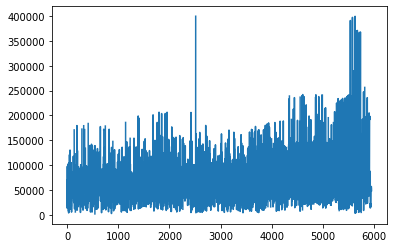

In [ ]:
plt.plot(ds['MORTDUE'])

In [ ]:
ds['MORTDUE'] = ds['MORTDUE'].fillna(ds['MORTDUE'].mean())

(array([1.093e+03, 3.076e+03, 1.115e+03, 4.390e+02, 1.200e+02, 8.300e+01,
        9.000e+00, 1.000e+00, 1.000e+00, 1.300e+01]),
 array([  2063. ,  41811.7,  81560.4, 121309.1, 161057.8, 200806.5,
        240555.2, 280303.9, 320052.6, 359801.3, 399550. ]),
 <a list of 10 Patch objects>)

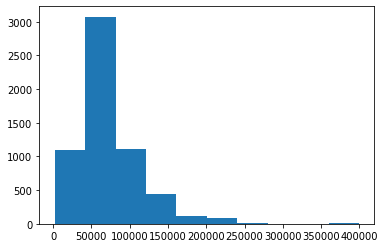

In [ ]:
plt.hist(ds['MORTDUE'])

In [13]:
ds['MORTDUE'] = np.log(ds['MORTDUE'])

Groups VALUE

In [14]:
ds['VALUE'].mean()

101776.04874145007

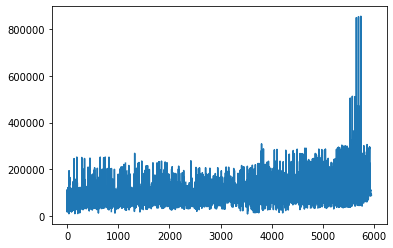

In [15]:
plt.plot(ds['VALUE'])

In [16]:
ds['VALUE'] = ds['VALUE'].fillna(ds['VALUE'].mean())

(array([3.141e+03, 2.257e+03, 4.400e+02, 9.400e+01, 2.000e+00, 1.200e+01,
        0.000e+00, 0.000e+00, 0.000e+00, 4.000e+00]),
 array([  8000. ,  92790.9, 177581.8, 262372.7, 347163.6, 431954.5,
        516745.4, 601536.3, 686327.2, 771118.1, 855909. ]),
 <a list of 10 Patch objects>)

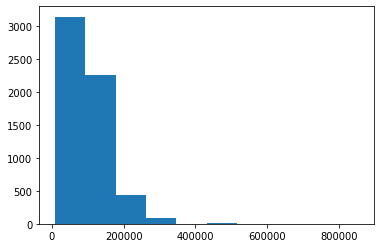

In [17]:
plt.hist(ds['VALUE'])

In [18]:
ds['VALUE'] = np.log(ds['VALUE'])

Groups REASON

In [19]:
ds['REASON'] = ds['REASON'].fillna('DebtCon')

In [20]:
ds['REASON'].unique()

array(['HomeImp', 'DebtCon'], dtype=object)

(array([1780.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        4170.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

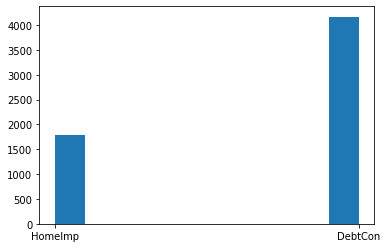

In [21]:
plt.hist(ds['REASON'])

In [22]:
ds['REASON'] = ds['REASON'].replace(['HomeImp', 'DebtCon'], [0, 1])

Groups JOB

In [23]:
ds['JOB'].unique()

array(['Other', 'Office', 'Sales', 'Mgr', 'ProfExe', nan, 'Self'],
      dtype=object)

In [24]:
ds['JOB'].mode()[0]

'Other'

In [25]:
ds['JOB'] = ds['JOB'].fillna(ds['JOB'].mode()[0])

(array([2657.,    0.,  948.,    0.,  109.,    0.,  767.,    0., 1276.,
         193.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <a list of 10 Patch objects>)

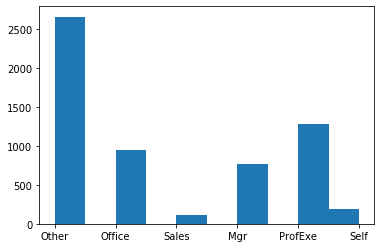

In [26]:
plt.hist(ds['JOB'])

In [27]:
ds['JOB'] = ds['JOB'].replace(['Other', 'Sales', 'Office', 'Mgr', 'ProfExe', 'Self'], [0, 1, 2, 3, 4, 5])

Groups YOJ

In [28]:
ds['YOJ'].mean()

8.918748851736183

In [29]:
ds['YOJ'] = ds['YOJ'].fillna(ds['YOJ'].mean())

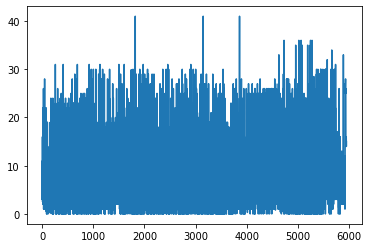

In [30]:
plt.plot(ds['YOJ'])

(array([1896., 1182., 1420.,  557.,  338.,  290.,  177.,   73.,   14.,
           3.]),
 array([ 0. ,  4.1,  8.2, 12.3, 16.4, 20.5, 24.6, 28.7, 32.8, 36.9, 41. ]),
 <a list of 10 Patch objects>)

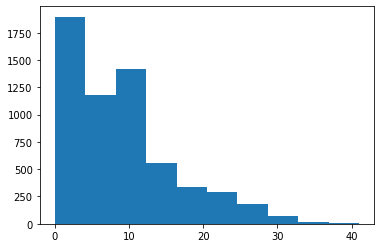

In [31]:
plt.hist(ds['YOJ'])

In [32]:
ds['YOJ'] = np.log(ds['YOJ']+1)

Groups DEROG

In [33]:
ds['DEROG'].std()

0.8460467770863016

In [34]:
ds['DEROG'] = ds['DEROG'].fillna(ds['DEROG'].std())

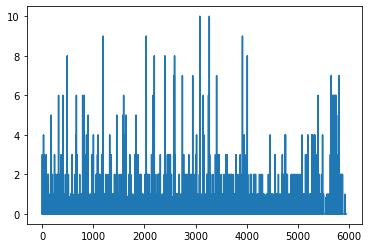

In [35]:
plt.plot(ds['DEROG'])

(array([5.225e+03, 4.350e+02, 1.600e+02, 5.800e+01, 2.300e+01, 1.500e+01,
        1.500e+01, 8.000e+00, 6.000e+00, 5.000e+00]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <a list of 10 Patch objects>)

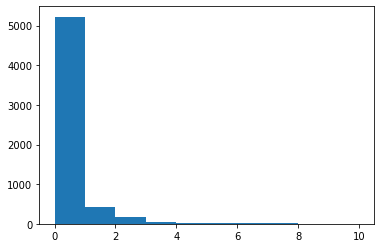

In [36]:
plt.hist(ds['DEROG'])

Groups DELINQ

In [37]:
ds['DELINQ'].std()

1.1272659176049586

In [38]:
ds['DELINQ'] = ds['DELINQ'].fillna(ds['DELINQ'].std())

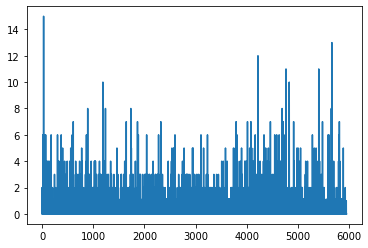

In [39]:
plt.plot(ds['DELINQ'])

(array([5.403e+03, 2.500e+02, 2.070e+02, 3.800e+01, 4.000e+01, 5.000e+00,
        2.000e+00, 2.000e+00, 2.000e+00, 1.000e+00]),
 array([ 0. ,  1.5,  3. ,  4.5,  6. ,  7.5,  9. , 10.5, 12. , 13.5, 15. ]),
 <a list of 10 Patch objects>)

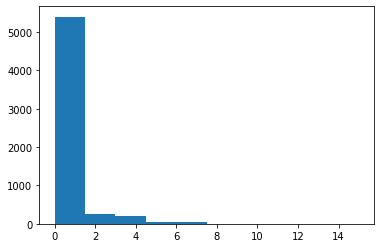

In [40]:
plt.hist(ds['DELINQ'])

Groups CLAGE

In [41]:
ds['CLAGE']

0        94.366667
1       121.833333
2       149.466667
3        93.333333
4       101.466002
           ...    
5945    221.808718
5946    208.692070
5947    212.279697
5948    213.892709
5949    219.601002
Name: CLAGE, Length: 5950, dtype: float64

In [42]:
ds['CLAGE'].mean()

179.76627518656667

In [43]:
ds['CLAGE'] = ds['CLAGE'].fillna(ds['CLAGE'].mean())

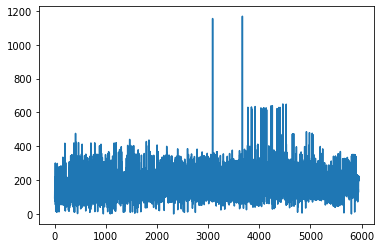

In [44]:
plt.plot(ds['CLAGE'])

(array([1.471e+03, 3.097e+03, 1.236e+03, 1.170e+02, 9.000e+00, 1.800e+01,
        0.000e+00, 0.000e+00, 0.000e+00, 2.000e+00]),
 array([   0.        ,  116.82335609,  233.64671218,  350.47006827,
         467.29342436,  584.11678045,  700.94013654,  817.76349263,
         934.58684872, 1051.41020481, 1168.2335609 ]),
 <a list of 10 Patch objects>)

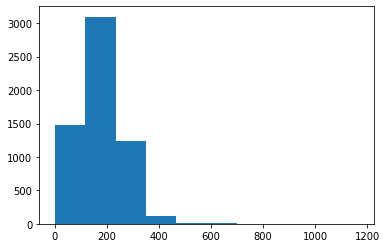

In [45]:
plt.hist(ds['CLAGE'])

Groups NINQ

In [46]:
ds['NINQ'].std()

1.728674971208009

In [47]:
ds['NINQ'] = ds['NINQ'].fillna(ds['NINQ'].std())

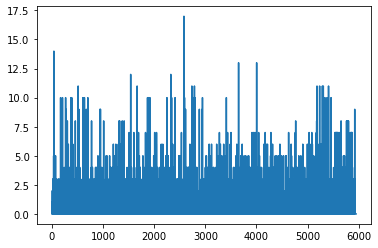

In [48]:
plt.plot(ds['NINQ'])

(array([3.870e+03, 1.672e+03, 2.310e+02, 5.600e+01, 6.600e+01, 3.900e+01,
        1.000e+01, 4.000e+00, 1.000e+00, 1.000e+00]),
 array([ 0. ,  1.7,  3.4,  5.1,  6.8,  8.5, 10.2, 11.9, 13.6, 15.3, 17. ]),
 <a list of 10 Patch objects>)

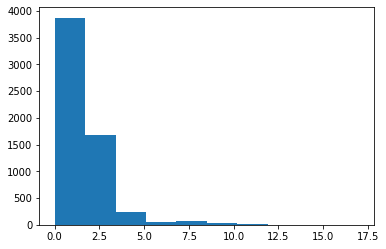

In [49]:
plt.hist(ds['NINQ'])

Groups DEBTINC

In [50]:
ds['DEBTINC'].mean()

33.796792383266364

In [51]:
ds['DEBTINC'] = ds['DEBTINC'].fillna(ds['DEBTINC'].mean())

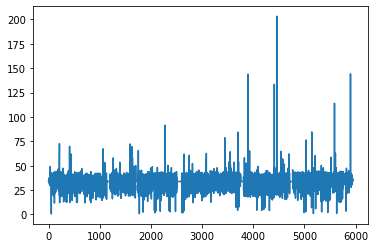

In [52]:
plt.plot(ds['DEBTINC'])

(array([2.540e+02, 5.142e+03, 5.290e+02, 1.700e+01, 3.000e+00, 1.000e+00,
        1.000e+00, 2.000e+00, 0.000e+00, 1.000e+00]),
 array([  0.52449922,  20.80326416,  41.08202911,  61.36079406,
         81.63955901, 101.91832395, 122.1970889 , 142.47585385,
        162.7546188 , 183.03338374, 203.31214869]),
 <a list of 10 Patch objects>)

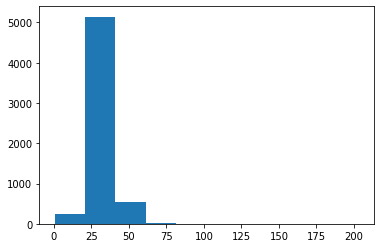

In [53]:
plt.hist(ds['DEBTINC'])

In [54]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5950 entries, 0 to 5949
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BAD      5950 non-null   int64  
 1   LOAN     5950 non-null   int64  
 2   MORTDUE  5950 non-null   float64
 3   VALUE    5950 non-null   float64
 4   REASON   5950 non-null   int64  
 5   JOB      5950 non-null   int64  
 6   YOJ      5950 non-null   float64
 7   DEROG    5950 non-null   float64
 8   DELINQ   5950 non-null   float64
 9   CLAGE    5950 non-null   float64
 10  NINQ     5950 non-null   float64
 11  CLNO     5738 non-null   float64
 12  DEBTINC  5950 non-null   float64
dtypes: float64(9), int64(4)
memory usage: 604.4 KB


In [55]:
ds = ds.drop('CLNO', axis = 1)

In [56]:
ds

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,DEBTINC
0,1,1100,10.160453,10.571958,0,0,2.442347,0.0,0.0,94.366667,1.0,33.796792
1,1,1300,11.157007,11.133128,0,0,2.079442,0.0,2.0,121.833333,0.0,33.796792
2,1,1500,9.510445,9.723164,0,0,1.609438,0.0,0.0,149.466667,1.0,33.796792
3,0,1700,11.490680,11.626254,0,2,1.386294,0.0,0.0,93.333333,0.0,33.796792
4,1,1700,10.327054,10.604603,0,0,2.302585,0.0,0.0,101.466002,1.0,37.113614
...,...,...,...,...,...,...,...,...,...,...,...,...
5945,0,88900,10.955427,11.409618,1,0,2.833213,0.0,0.0,221.808718,0.0,36.112347
5946,0,89000,10.907350,11.439677,1,0,2.833213,0.0,0.0,208.692070,0.0,35.859971
5947,0,89200,10.897572,11.439537,1,0,2.772589,0.0,0.0,212.279697,0.0,35.556590
5948,0,89800,10.827151,11.428032,1,0,2.708050,0.0,0.0,213.892709,0.0,34.340882


Fin Data Preprocessing

In [57]:
y = ds['BAD']
X = ds.drop(['BAD'], axis = 1)

In [58]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X)
X = scaler.transform(X)

In [59]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=0)

## Let's check some models

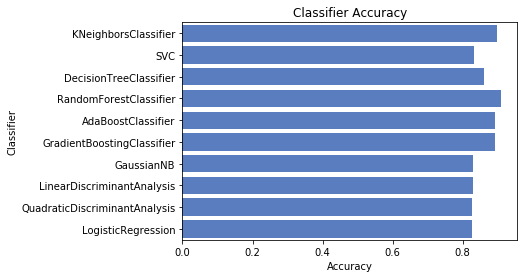

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression

classifiers = [
    KNeighborsClassifier(3),
    SVC(probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis(),
    LogisticRegression()
]

log_cols = ["Classifier", "Accuracy"]
log = pd.DataFrame(columns=log_cols)

acc_dict = {}

for clf in classifiers:
    name = clf.__class__.__name__
    clf.fit(X_train, y_train)
    train_predictions = clf.predict(X_test)
    acc = accuracy_score(y_test, train_predictions)
        
    if name in acc_dict:
        acc_dict[name] += acc
    else:
        acc_dict[name] = acc

for clf in acc_dict:
    acc_dict[clf] = acc_dict[clf]
    log_entry = pd.DataFrame([[clf, acc_dict[clf]]], columns = log_cols)
    log = log.append(log_entry)

plt.xlabel('Accuracy')
plt.title('Classifier Accuracy')

sns.set_color_codes("muted")
sns.barplot(x = 'Accuracy', y = 'Classifier', data = log, color = "b")

In [61]:
acc_dict

{'KNeighborsClassifier': 0.8991596638655462,
 'SVC': 0.8319327731092437,
 'DecisionTreeClassifier': 0.8613445378151261,
 'RandomForestClassifier': 0.9100840336134454,
 'AdaBoostClassifier': 0.8915966386554622,
 'GradientBoostingClassifier': 0.892436974789916,
 'GaussianNB': 0.8302521008403362,
 'LinearDiscriminantAnalysis': 0.8294117647058824,
 'QuadraticDiscriminantAnalysis': 0.8277310924369747,
 'LogisticRegression': 0.8252100840336134}

In [62]:
## Best model RandomForestClassifier, take it and use with new parametrs

In [63]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(random_state=0)
rfc.fit(X_train, y_train)

print('score=',rfc.score(X_test, y_test))
y_pred = rfc.predict(X_test)

from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

score= 0.9100840336134454
[[930  21]
 [ 86 153]]


score= 0.9100840336134454